<h1>Project1- King County WA House Price Prediction</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore') #will not show warnings


<h3>Import data</h3>

In [2]:
df=pd.read_csv('kc_house_data.csv')

##EDA

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe() #Statistics

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#outlier is +-mean+- 3std

In [7]:
df['bedrooms'].describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [8]:
3.370842+3*0.930062

6.161028

In [9]:
df=df[df['bedrooms']<10]

In [10]:
df.shape

(21608, 21)

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,4.580474e+09,5.400457e+05,3.368197,2.114552,2079.652582,1.510873e+04,1.494285,0.007544,0.234265,3.409339,7.656933,1788.304239,291.348343,1971.010274,84.329276,98077.942845,47.560040,-122.213886,1986.580387,12769.757173
std,2.876519e+09,3.671441e+05,0.903207,0.769905,918.284940,4.142511e+04,0.539998,0.086527,0.766305,0.650692,1.175525,828.104685,442.411884,29.370279,401.512854,53.505685,0.138575,0.140835,685.425404,27307.157393
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1424.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068725e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,9.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df.corr()

ValueError: could not convert string to float: '20141013T000000'

In [ ]:
abs(df.corr()['price']).sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

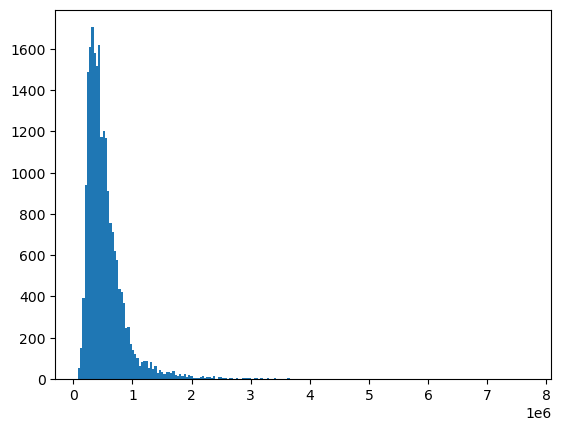

In [14]:
plt.hist(df['price'],bins=200);

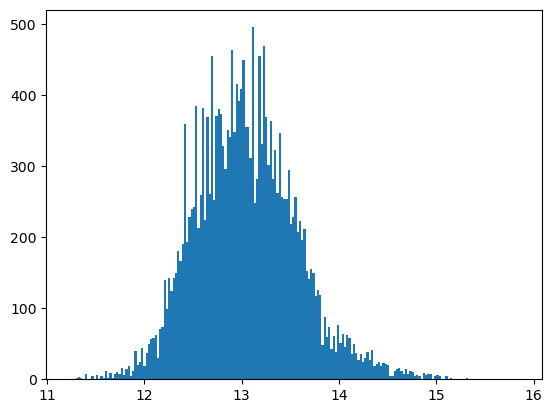

In [15]:
import numpy as np
plt.hist(np.log(df['price']),bins=200);

# Feature Engineering

In [16]:
df['zipcode']=df['zipcode'].astype('object') #zipcode is object, otherwise python will treat it as no.

In [17]:
df['age']=2023-df['yr_built']

In [18]:
df=df[df['bathrooms']<5]

In [19]:
df.shape

(21545, 22)

In [20]:
df['bedrooms']=df['bedrooms']**2  #bedroom has high priority

In [21]:
df['bathrooms']=df['bathrooms']**2

In [22]:
#priority for basement
#renovated houses
df['basement']=np.where(df['sqft_basement']>0,1,0) #if there's basement put 1 else 0 
df['renovated']=np.where(df['yr_renovated']>0,1,0)

In [23]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,basement,renovated
0,7129300520,20141013T000000,221900.0,9,1.0000,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,68,0,0
1,6414100192,20141209T000000,538000.0,9,5.0625,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,72,1,1
2,5631500400,20150225T000000,180000.0,4,1.0000,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,90,0,0
3,2487200875,20141209T000000,604000.0,16,9.0000,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,58,1,0
4,1954400510,20150218T000000,510000.0,9,4.0000,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,36,0,0


In [24]:
#instead of outlier analysis
outliers=df.quantile(0.97)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
df=df[df['price']<outliers['price']]
df=df[df['bedrooms']<outliers['bedrooms']]
df=df[df['sqft_living']<outliers['sqft_living']]

In [ ]:
df.describe()

In [25]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'basement',
       'renovated'],
      dtype='object')

In [26]:
#modelling

In [27]:
x=df[['bedrooms', 'bathrooms', 'sqft_living','grade','zipcode','basement','waterfront','floors','age','renovated','sqft_above']]

In [28]:
y=df[['price']]

In [29]:
x=pd.get_dummies(x,drop_first=True) 

In [30]:
x.head()

,bedrooms,bathrooms,sqft_living,grade,basement,waterfront,floors,age,renovated,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,1.0,68,0,1180,...,False,False,False,False,False,False,True,False,False,False
1,9,5.0625,2570,7,1,0,2.0,72,1,2170,...,False,False,False,False,False,False,False,False,False,False
2,4,1.0000,770,6,0,0,1.0,90,0,770,...,False,False,False,False,False,False,False,False,False,False
3,16,9.0000,1960,7,1,0,1.0,58,0,1050,...,False,False,False,False,False,False,False,False,False,False
4,9,4.0000,1680,8,0,0,1.0,36,0,1680,...,False,False,False,False,False,False,False,False,False,False


In [31]:
#seed
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [32]:
lr=LinearRegression()

In [33]:
model=lr.fit(x_train,y_train)

In [34]:
pred=model.predict(x_test)

In [35]:
r2_score(pred,y_test)

0.7143055367565414

In [36]:
(mean_squared_error(pred,y_test))**0.5

167164.02630161896

In [37]:
R=Ridge()
L=Lasso()
EN=ElasticNet()

In [38]:
R.fit(x_train,y_train)
L.fit(x_train,y_train)
EN.fit(x_train,y_train)

ElasticNet()

In [39]:
predr=R.predict(x_test)
predl=L.predict(x_test)
preden=EN.predict(x_test)

In [40]:
r2_score(predr,y_test)

0.7121802781822348

In [41]:
r2_score(predl,y_test)

0.7142392810102116

In [42]:
r2_score(preden,y_test)

0.21516368964500787

In [43]:
ETR=ExtraTreeRegressor()

In [44]:
ETR.fit(x_train,y_train)

ExtraTreeRegressor()

In [45]:
predetr=ETR.predict(x_test)

In [46]:
r2_score(predetr,y_test)

0.6642936740912015

In [47]:
#DRY method - DO not repeat yourself

In [48]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    XGBC= XGBRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR,XGBC]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting','XGradientBooting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)


In [49]:
algo_test(x,y)

,R_Squared,RMSE,MAE
XGradientBooting,0.839401,142692.271376,81069.315916
Gradient Boosting,0.805289,157117.570692,102884.705534
Lasso,0.803585,157803.477158,96056.864287
Linear,0.803582,157804.777833,96068.561669
Ridge,0.803298,157918.950780,96085.991278
Extra Tree,0.719269,188657.800443,106384.950569
ElasticNet,0.607106,223186.068341,141640.617968
